In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Import data
star_wars = pd.read_csv('star_wars.csv', encoding="ISO-8859-1")

In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [4]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
#Checking for duplicates
star_wars.duplicated().sum()

0

In [6]:
#Checking for missing values
star_wars.isnull().sum()

RespondentID                                                                                                                                       0
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

In [7]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [8]:
'''
Cleaning and Mapping Yes/No Columns
Converting the Have you seen any of the 6 films in the Star Wars franchise? and  Do you consider yourself to be a fan of the Star Wars film franchise?  
columns to the Boolean type.
'''
bool_series = {
    "Yes": True,
    "No": False
}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(bool_series)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(bool_series)

In [9]:
#Updated values boolean values
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] .value_counts()

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
False    284
Name: count, dtype: int64

### Cleaning and Mapping Checkbox Columns

In [10]:
# #Converting columns to a Boolean 
bool_movie_mapping = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True, 
    np.NaN: False  
    }
    
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(bool_movie_mapping)



In [11]:
#Renaming movie columns
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2', 
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5', 
    'Unnamed: 8': 'seen_6',
})

In [12]:

star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


### Cleaning the Ranking Columns

In [13]:
# star_wars.columns

In [14]:
'''Converting columns 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14' to a float type
'''
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


In [15]:
#Renaming columns
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3', 
    'Unnamed: 12': 'ranking_4', 
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
})

### Finding the Highest-Ranked Movie

In [16]:
#Calculating the average rating for each movie
col = ['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']
means = star_wars[col].mean()
#Plotting the average ratings
# means.plot.bar()
means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

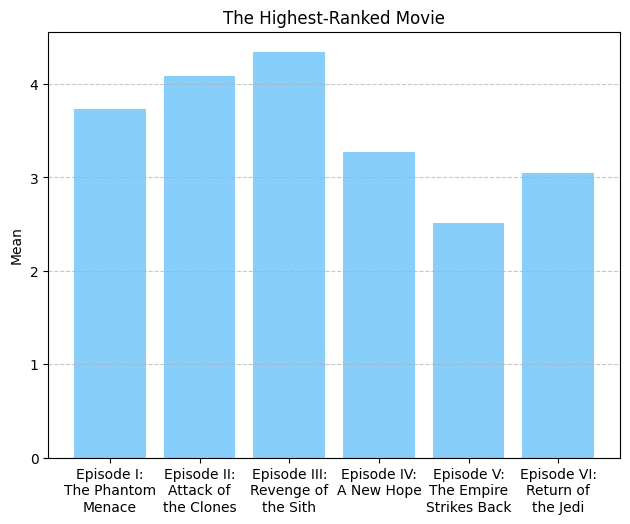

In [17]:
# plt.figure(figsize=(10, 6))
plt.bar(means.index, means, color='lightskyblue')
plt.ylabel('Mean')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Adding xticks labels, renaming to the more readable format
plt.xticks(
    means.index,
    [
        'Episode I:\nThe Phantom\nMenace',
        'Episode II:\nAttack of\nthe Clones',
        'Episode III:\nRevenge of\nthe Sith',
        'Episode IV:\nA New Hope',
        'Episode V:\nThe Empire\nStrikes Back',
        'Episode VI:\nReturn of\nthe Jedi'
    ],
    ha='center'    
)
plt.title('The Highest-Ranked Movie')

plt.show()

- `Star Wars: Episode V The Empire Strikes Back` has the  highest rank.
- `Star Wars: Episode III Revenge of the Sith` has the lowest score folowed by `Star Wars: Episode II Attack of the Clones` and  `Star Wars: Episode I The Phantom Menace`



### Finding the Most Viewed Movie

In [18]:
#Count the total views
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

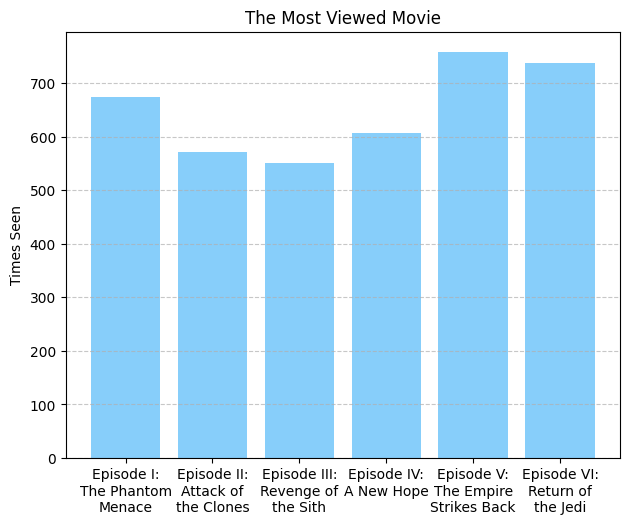

In [19]:
# plt.figure(figsize=(10, 6))
plt.bar(star_wars.columns[3:9],star_wars[star_wars.columns[3:9]].sum(),color='lightskyblue')
plt.ylabel('Times Seen')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Adding xticks labels, renaming to the more readable format
plt.xticks(
    star_wars.columns[3:9],
    [
        'Episode I:\nThe Phantom\nMenace',
        'Episode II:\nAttack of\nthe Clones',
        'Episode III:\nRevenge of\nthe Sith',
        'Episode IV:\nA New Hope',
        'Episode V:\nThe Empire\nStrikes Back',
        'Episode VI:\nReturn of\nthe Jedi'
    ],
    ha='center'   
)
plt.title('The Most Viewed Movie')

plt.show()

 `Episode V The Empire Strikes Back` and `Episode VI Return of the Jedi` are the most-seen Star Wars movies, and they correspond with their highest ranks as well.

### Exploring the Data by Binary Segments: Gender

In [20]:
#Split df into two groups: based on gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [21]:
#Calculating the average rating for each movie based on gender
col = ['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']
male_means = males[col].mean()
fem_means = females[col].mean()

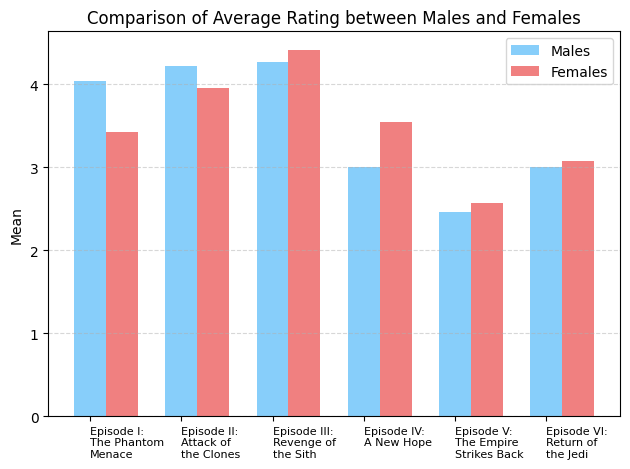

In [22]:
col_names = ['Episode I:\nThe Phantom\nMenace',
        'Episode II:\nAttack of\nthe Clones',
        'Episode III:\nRevenge of\nthe Sith',
        'Episode IV:\nA New Hope',
        'Episode V:\nThe Empire\nStrikes Back',
        'Episode VI:\nReturn of\nthe Jedi']

# the width of the bars
bar_width = 0.35

# the label locations
x = range(len(male_means))

# plt.figure(figsize=(10, 6))

# Plotting males' mean values
plt.bar(x, male_means, bar_width, label='Males',color='lightskyblue')

# Plotting females' mean values shifted by the bar_width to the right
plt.bar([i + bar_width for i in x], fem_means, bar_width, label='Females',color='lightcoral')

# Adding labels and titles
# plt.xlabel('Movies')
plt.ylabel('Mean')
plt.title('Comparison of Average Rating between Males and Females')

# Set x-axis ticks with labels from col_names
plt.xticks(range(len(male_means)), col_names, ha="left", size=8)  

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


It appears that women tend to rate `Episode I` higher than men do, while men tend to give higher ratings to `Episode IV`. The remaining episodes receive similar ratings across genders.


<!-- The mean rankings provide intriguing insights into the preferences of male and female survey respondents regarding the Star Wars movies. It's worth noting again that a ranking of 1 indicates the most favorite, while a ranking of 6 indicates the least. -->

<!-- Among males, Episode V: The Empire Strikes Back stands out as the top favorite, with a mean ranking of approximately 2.46, closely followed by Episode IV: A New Hope and Episode VI: Return of the Jedi. Overall, the first three episodes received poorer rankings compared to the last three, suggesting a weaker preference among male respondents for the earlier Star Wars episodes.

In contrast, among female respondents, Episode V: The Empire Strikes Back also emerges as a favorite, with a mean ranking of approximately 2.57. However, Episode IV: A New Hope received a poorer ranking compared to males. Additionally, Episode III: Revenge of the Sith received the worst ranking among all the Star Wars movies, suggesting a less favorable perception of this film among females as well. -->

### Finding the Most Viewed Movie: Females vs Males

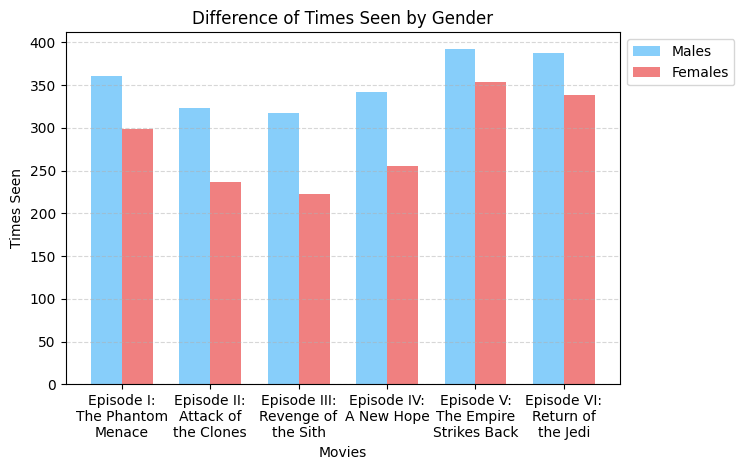

In [23]:

col_names = ['Episode I:\nThe Phantom\nMenace',
        'Episode II:\nAttack of\nthe Clones',
        'Episode III:\nRevenge of\nthe Sith',
        'Episode IV:\nA New Hope',
        'Episode V:\nThe Empire\nStrikes Back',
        'Episode VI:\nReturn of\nthe Jedi']
#Get the labels
movies = males.columns[3:9]

# the label locations
x = np.arange(len(movies))

# the width of the bars
bar_width = 0.35

#Plotting the bars
fig, ax = plt.subplots()

ax.bar(x - bar_width/2, males[males.columns[3:9]].sum(), bar_width, color='lightskyblue', label='Males')
ax.bar(x + bar_width/2, females[females.columns[3:9]].sum(), bar_width, color='lightcoral', label='Females')

# Adding labels and grid
ax.set_ylabel('Times Seen')
ax.set_xlabel('Movies')
ax.set_title('Difference of Times Seen by Gender')
ax.set_xticks(x)
ax.set_xticklabels(col_names)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.0,1.0))

# Show the plot
plt.show()



- In general, men tend to watch all episodes more frequently than women. However, women exhibit higher viewership for the top-ranked `Episode V` and `Episode VI`, while showing less interest in `Episode II`, `Episode III`, and `Episode IV`.
- Despite having the lower rating, `Episode I` attracts the highest number of views from both genders after `Episode V` and `Episode VI`.

### Exploring the Data by Education

In [25]:
star_wars['Education'].value_counts()

Education
Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: count, dtype: int64

In [26]:
#Checking for null values
star_wars['Education'].isnull().sum()

150

In [27]:
#Filling the misisng values in "Education" with "Unknown"
star_wars["Education"].fillna("Unknown", inplace=True)

In [28]:
#Re-check for null values
star_wars['Education'].isnull().sum()

0

In [29]:
star_wars['Education'].value_counts()

Education
Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
Unknown                             150
High school degree                  105
Less than high school degree          7
Name: count, dtype: int64

In [30]:
#Calculating rating means for education column
# col = ['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']
grouped_data = star_wars.groupby('Education')[col].mean()
grouped_data


,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Education,,,,,,
Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
Less than high school degree,5.000000,5.333333,3.666667,2.666667,1.000000,3.333333
Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228
Unknown,3.350000,3.450000,4.100000,3.550000,2.850000,3.700000


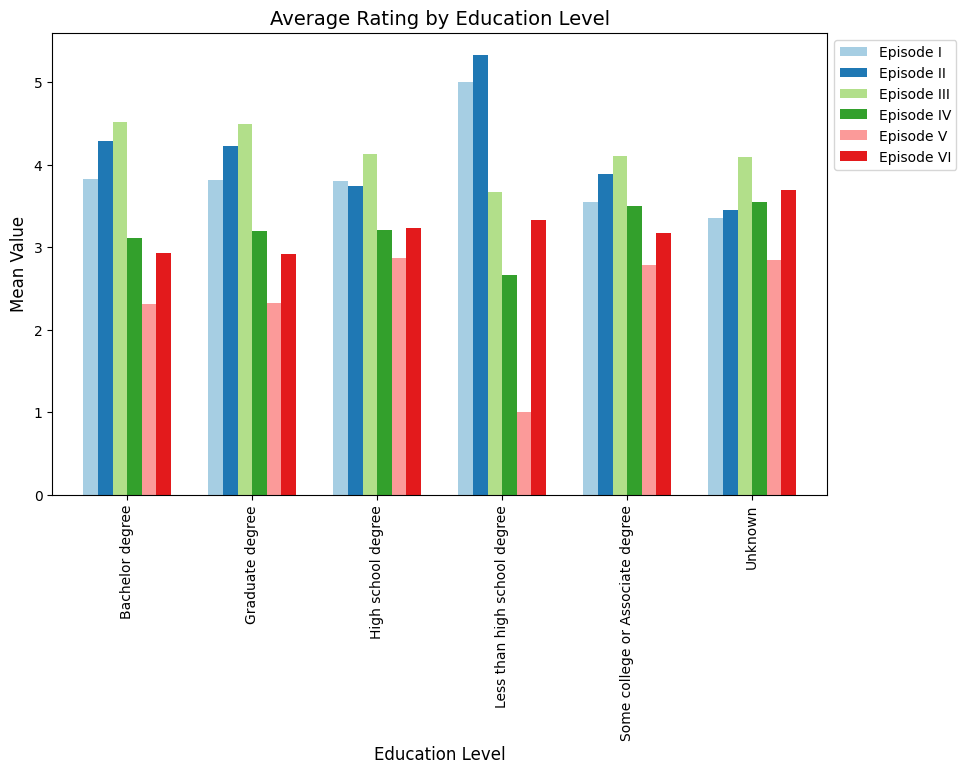

In [31]:
legend_names = ['Episode I','Episode II','Episode III','Episode IV','Episode V','Episode VI']

grouped_data = star_wars.groupby('Education')[col].mean()

custom_palette = sns.color_palette("Paired", len(grouped_data))
# Plotting the bar plot
ax = grouped_data.plot(kind='bar', figsize=(10, 6),width=0.7, color=custom_palette)

# Customizing labels and title
ax.set_xlabel('Education Level', fontsize=12)
ax.set_ylabel('Mean Value', fontsize=12)
ax.set_title('Average Rating by Education Level', fontsize=14)

# Rotating x-axis labels for better readability if necessary
plt.xticks(rotation=90)
plt.legend(legend_names, bbox_to_anchor=(1.0,1.0))

# Show plot
plt.show()

Among all educational levels, `Episode V` receives the highest rating, while `Episode III` is regarded as the least favorable movie, with the exception of the "less than high school" group, which is too small to accurately assess its representativeness.

### Exploring the Data by Location

In [32]:
#Creatinig a copy of the original df
sw_df = star_wars.copy()
sw_df['Location (Census Region)'].value_counts()

Location (Census Region)
East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: count, dtype: int64

In [33]:
#Checking for null values
sw_df['Location (Census Region)'].isnull().sum()

143

In [34]:
#Filling the misisng values in "Location" with "Unknown"
sw_df['Location (Census Region)'].fillna("Unknown", inplace=True)
#Re-check for null values
sw_df['Location (Census Region)'].isnull().sum()


0

In [35]:
#Renaming columns
new_names = {'ranking_1': 'Episode I',
             'ranking_2': 'Episode II',
             'ranking_3': 'Episode III',
             'ranking_4': 'Episode IV',
             'ranking_5': 'Episode V',
             'ranking_6': 'Episode VI'

}
sw_df.rename(columns=new_names, inplace=True)

In [36]:
new_columns = ['Episode I','Episode II','Episode III','Episode IV','Episode V','Episode VI']
grouped_loc = sw_df.groupby('Location (Census Region)')[new_columns].mean().reset_index()
grouped_loc

,Location (Census Region),Episode I,Episode II,Episode III,Episode IV,Episode V,Episode VI
0,East North Central,3.723881,4.074627,4.410448,3.358209,2.373134,3.059701
1,East South Central,3.875000,4.593750,4.375000,2.875000,2.250000,3.031250
2,Middle Atlantic,3.924731,4.215054,4.413043,3.064516,2.440860,2.924731
3,Mountain,4.000000,4.000000,4.279412,2.970588,2.794118,2.955882
4,New England,4.203390,4.166667,4.133333,3.083333,2.516667,2.866667
5,Pacific,3.582192,3.821918,4.171233,3.219178,2.739726,3.465753
6,South Atlantic,3.684211,4.180451,4.443609,3.406015,2.398496,2.887218
7,Unknown,3.277778,3.944444,4.333333,3.611111,2.555556,3.277778
8,West North Central,3.671053,4.105263,4.355263,3.368421,2.552632,2.947368
9,West South Central,3.394737,4.118421,4.473684,3.657895,2.421053,2.934211


In [37]:
legend_names = ['Episode I','Episode II','Episode III','Episode IV','Episode V','Episode VI']

# Grouping the data
grouped_loc = sw_df.groupby('Location (Census Region)')[new_columns].mean().reset_index()

# Plotting the bar plot with Plotly Express
fig = px.bar(grouped_loc, x='Location (Census Region)', y=new_columns, 
             title='Average Rating by Location', barmode='group', width=1100, height=600
             )

fig.update_layout(xaxis_tickangle=-45, 
                  xaxis_title_font_size=12,
                  yaxis_title_font_size=12,
                  title_font_size=14,
                  legend_title_text=None)

    
fig.show()


- `Episode V` is a winner across all locations. 
- `Episode II` has the lowest rating only in East South Central Location.
- New England rated almost equally low: `Episode I`,`Episode II`, and`Episode III`

### Exploring the Data by Age

In [38]:
#Checking Age column for null values
print(f"Number of missing values: {sw_df['Age'].isnull().sum()}")
#Replacing missing values No Data
sw_df['Age'].fillna("No Data", inplace=True)

Number of missing values: 140


In [39]:
sw_df["Age"].value_counts()

Age
45-60      291
> 60       269
30-44      268
18-29      218
No Data    140
Name: count, dtype: int64

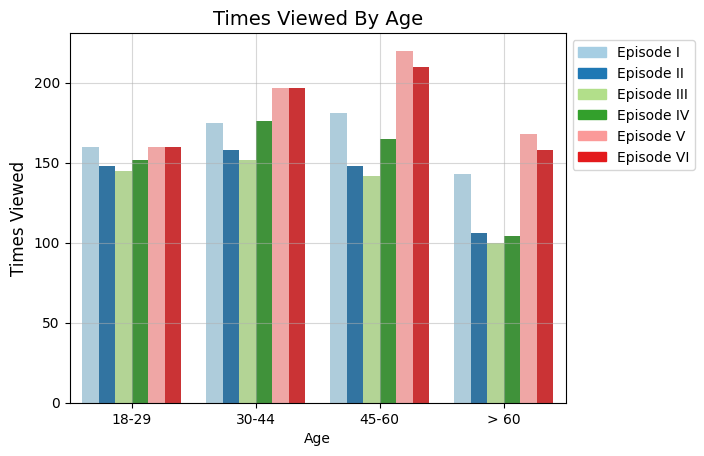

In [64]:
#Most vieved movie by age
legend_names = ['Episode I','Episode II','Episode III','Episode IV','Episode V','Episode VI']
grouped_data = sw_df.groupby('Age')[sw_df.columns[3:9]].sum()

#Reset index to make "Age" a column
grouped_data = grouped_data.reset_index()

#Exclude "No Data" fields
filtered_data = grouped_data[grouped_data['Age'] != "No Data"]

#melt df to have "Age" as a categorical variable
melted_sw = pd.melt(filtered_data, id_vars=['Age'], var_name="Seen", value_name='Count')


custom_palette = sns.color_palette("Paired", len(legend_names))
# print(len(custom_palette))
# Plotting the bar plot
# plt.figure(figsize=(10,6))

sns.barplot(x="Age", y="Count", hue='Seen', data=melted_sw, palette=custom_palette)

# Customizing labels and title
plt.xlabel('Age')
plt.ylabel('Times Viewed', fontsize=12)
plt.title('Times Viewed By Age', fontsize=14)
plt.grid(alpha=0.5)

plt.xticks(rotation=360)
# plt.legend(legend_names, bbox_to_anchor=(1.0,1.0))
custom_legend = [plt.Rectangle((0,0),1,1, color=color) for color in custom_palette]
plt.legend(custom_legend, legend_names, bbox_to_anchor=(1.0,1.0))

plt.show()

- Viewership is lower among those aged 60 and above, yet their interest peaks notably with `Episode I`. However, viewership drops significantly thereafter, rising again only for `Episode V` and `Episode VI. 
- A similar trend can be seen within the 45-60 age category. 
- Conversely, the 18-29 age group demonstrates nearly equal viewership across all episodes, mirroring the pattern observed in the 30-44 age group.

### Exploring the Data by the Fan Base: Star Trek vs Star Wars

In [68]:
#Cleaning and Mapping 
bool_series = {
    "Yes": True,
    "No": False
}
sw_df['Do you consider yourself to be a fan of the Star Trek franchise?'] = sw_df['Do you consider yourself to be a fan of the Star Trek franchise?'].map(bool_series)
sw_df['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()


Series([], Name: count, dtype: int64)

In [45]:
sw_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
False    284
Name: count, dtype: int64

In [47]:
#Create a new dataframe
new_df = sw_df[['Do you consider yourself to be a fan of the Star Wars film franchise?','Do you consider yourself to be a fan of the Star Trek franchise?',
                      'Gender', 'Age', 'Household Income', 'Education', 'Location (Census Region)']].copy()

In [70]:
#Renaming columns
new_df = new_df.rename(columns={
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Star Wars fan',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'Star Trek fan' 
})

In [71]:
new_df.head()

,Star Wars fan,Star Trek fan,Gender,Age,Household Income,Education,Location (Census Region)
0,True,False,Male,18-29,NaN,High school degree,South Atlantic
1,No Data,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,False,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,True,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,True,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [50]:
#Replacing missing values with NaN
new_df['Star Trek fan'].fillna("No Data", inplace=True)
new_df['Star Wars fan'].fillna("No Data", inplace=True)

In [51]:
#Checking for null values
print(f"Number of null values: {new_df['Star Trek fan'].isnull().sum()}")
print(f"Number of null values: {new_df['Star Wars fan'].isnull().sum()}")

Number of null values: 0
Number of null values: 0


In [52]:
new_df['Age'].value_counts()

Age
45-60      291
> 60       269
30-44      268
18-29      218
No Data    140
Name: count, dtype: int64

In [73]:
#Filtering data by removing "No Data" rows
filtered_data = new_df[(new_df['Age'] != "No Data") & (new_df['Star Trek fan'] != "No Data") & (new_df['Star Wars fan'] != "No Data")]
filtered_data
# sns.countplot(x="Age", data=filtered_data, hue="Star Wars fan")
# plt.show()

,Star Wars fan,Star Trek fan,Gender,Age,Household Income,Education,Location (Census Region)
0,True,False,Male,18-29,NaN,High school degree,South Atlantic
2,False,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,True,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,True,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,True,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
...,...,...,...,...,...,...,...
1180,True,False,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific
1181,True,True,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,True,True,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,True,True,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


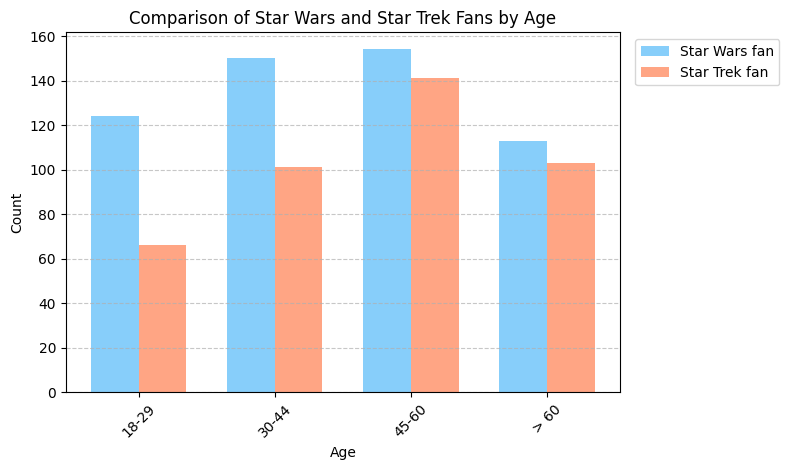

In [80]:
grouped = filtered_data.groupby('Age')[['Star Wars fan', 'Star Trek fan']].sum().reset_index()

# the label locationsrs
positions = np.arange(len(grouped['Age']))

#The width of each bar
bar_width = 0.35

# Create the figure and axis
# plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the bars
ax.bar(positions - bar_width/2, grouped['Star Wars fan'], bar_width, color='lightskyblue', label='Star Wars fan')
ax.bar(positions + bar_width/2, grouped['Star Trek fan'], bar_width, color='coral', label='Star Trek fan', alpha=0.7)

#Set labels and xticks
ax.set_xticks(positions)
ax.set_xticklabels(grouped['Age'])
plt.xticks(rotation=45)

plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Comparison of Star Wars and Star Trek Fans by Age')

plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()


In terms of preference, the younger demographic (18-29) shows a clear inclination towards Star Wars compared to Star Trek. Conversely, the middle-aged (45-60) and older (>60) cohorts exhibit a higher concentration of Star Trek fans, with their numbers nearly rivaling those of Star Wars fans.

### The most Favorably/Unfavorably of Star Wars Characters

In [87]:
#Renaming columns

star_wars = star_wars.rename(columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
        "Unnamed: 16": "Luke Skywalker",
        "Unnamed: 17": "Princess Leia Organa",
        "Unnamed: 18": "Anakin Skywalker",
        "Unnamed: 19": "Obi Wan Kenobi",
        "Unnamed: 20": "Darth Sidious",
        "Unnamed: 21": "Darth Vader",
        "Unnamed: 22": "Lando Calrissian",
        "Unnamed: 23": "Boba Fett",
        "Unnamed: 24": "C-3P0",
        "Unnamed: 25": "R2-D2",
        "Unnamed: 26": "Jar Jar Binks",
        "Unnamed: 27": "Padme Amidala",
        "Unnamed: 28": "Yoda"
        })

''' Creating a dictionary with scores in range [-2:2] where:
                         -2: very unfavorably
                         -1: somewhat unfavorably
                         0 - No data, unfamiliar, neutral
                         1: somehow favorably
                         2: very favorably
    
'''
scores = {
        "Very unfavorably": -2,
        "Somewhat unfavorably": -1,
        "Neither favorably nor unfavorably (neutral)": 0,
        "Somewhat favorably": 1,
        "Very favorably": 2,
        "Unfamiliar (N/A)": 0,
         np.nan: 0   
}

#Applying acores to the characters/columns
for c in star_wars.columns[15:29]:
    star_wars[c] = star_wars[c].map(scores)

star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,0,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


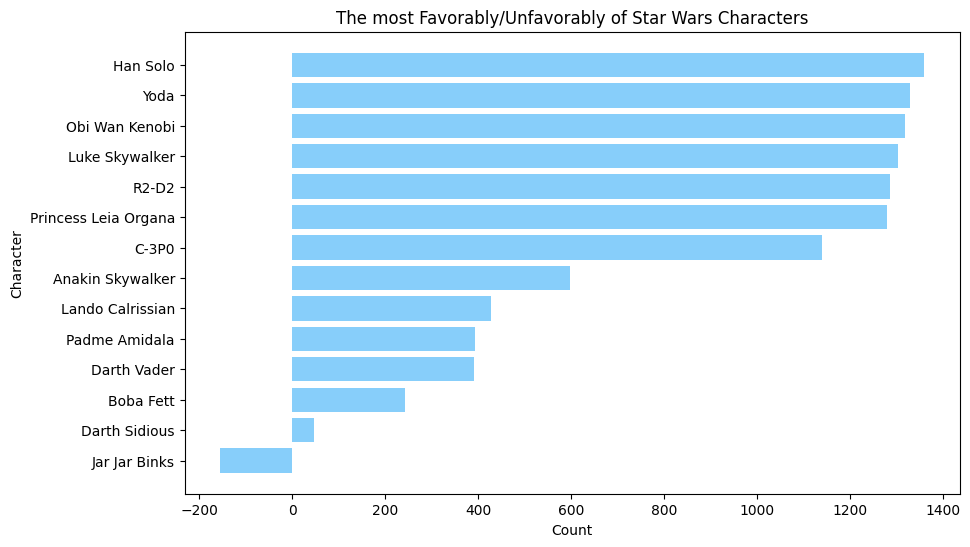

In [57]:
df_char = star_wars[star_wars.columns[15:29]].sum().sort_values(ascending=True)

characters = df_char.index
counts = df_char.values

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(characters, counts, color='lightskyblue')
plt.xlabel('Count')
plt.ylabel('Character')
plt.title('The most Favorably/Unfavorably of Star Wars Characters')
plt.show()
